#jquants-api-client 
日本の株価がとれると聞いたのでテスト


In [19]:
!pip3 install japanize_matplotlib jquants-api-client


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
# https://jpx-jquants.com/ jquants APIを使って株価を取得
# 何をRefreshするんだろう？？ ページ上でその名前だからそのまま使うが...
import os
from getpass import getpass


refresh_token=getpass('Enter your jquants REFRESH_TOKEN : ')


Enter your jquants API_TOKEN : ··········


In [13]:
# https://github.com/J-Quants/jquants-api-client-python

import jquantsapi

jqapi = jquantsapi.Client(refresh_token=refresh_token)

df_list = jqapi.get_list()
df_list.head(2)



,Date,Code,CompanyName,Sector17Code,Sector17CodeName,Sector33Code,Sector33CodeName,ScaleCategory,MarketCode,MarketCodeName,Sector17CodeNameEnglish,Sector33CodeNameEnglish,MarketCodeNameEnglish
0,2023-02-28,13010,極洋,1,食品,0050,水産・農林業,TOPIX Small 2,0111,プライム,FOODS,"Fishery, Agriculture & Forestry",Prime
1,2023-02-28,13050,大和アセットマネジメント株式会社 ダイワ上場投信−トピックス,99,その他,9999,その他,-,0109,その他,OTHER,Other,Others


In [63]:

import os
from datetime import datetime

import japanize_matplotlib
import jquantsapi
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 表示する銘柄のコードを指定します (e.g. 8697)
TARGET_SYMBOLS = [
    "7201",  # 日産
    "7203",  # トヨタ
    "7267",  # ホンダ
]

# 基準となる営業日付を指定します。(YYYY-MM-DD)
# **土日や祝日などの営業日以外を入力すると適切に機能しません**


# BASE_DATE = "2023-01-01" <- ** これはNG **
BASE_DATE = "2023-01-04"


In [27]:

# TARGET_SYMBOLS が4桁で入力されている場合は末尾に0を付与する
for i in range(len(TARGET_SYMBOLS)):
    if len(TARGET_SYMBOLS[i]) == 4:
        TARGET_SYMBOLS[i] += "0"

In [33]:
# 株価情報を取得します
buff = []
for code in TARGET_SYMBOLS:
    df = jqapi.get_prices_daily_quotes(code=code)
    buff.append(df)


In [34]:
df

,Date,Code,Open,High,Low,Close,Volume,TurnoverValue,AdjustmentFactor,AdjustmentOpen,AdjustmentHigh,AdjustmentLow,AdjustmentClose,AdjustmentVolume
0,2021-03-01,72670,2971.0,3020.0,2960.0,3018.0,5915200.0,1.772475e+10,1.0,2971.0,3020.0,2960.0,3018.0,5915200.0
1,2021-03-02,72670,3038.0,3063.0,2960.0,2994.0,7429700.0,2.231675e+10,1.0,3038.0,3063.0,2960.0,2994.0,7429700.0
2,2021-03-03,72670,3039.0,3112.0,3037.0,3101.0,7759100.0,2.391353e+10,1.0,3039.0,3112.0,3037.0,3101.0,7759100.0
3,2021-03-04,72670,3118.0,3125.0,3001.0,3052.0,5275500.0,1.612952e+10,1.0,3118.0,3125.0,3001.0,3052.0,5275500.0
4,2021-03-05,72670,3061.0,3101.0,3015.0,3101.0,6065400.0,1.860052e+10,1.0,3061.0,3101.0,3015.0,3101.0,6065400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,2023-02-21,72670,3470.0,3547.0,3466.0,3533.0,5997900.0,2.112098e+10,1.0,3470.0,3547.0,3466.0,3533.0,5997900.0
486,2023-02-22,72670,3501.0,3516.0,3479.0,3494.0,5243400.0,1.832791e+10,1.0,3501.0,3516.0,3479.0,3494.0,5243400.0
487,2023-02-24,72670,3538.0,3555.0,3515.0,3518.0,5796400.0,2.047483e+10,1.0,3538.0,3555.0,3515.0,3518.0,5796400.0
488,2023-02-27,72670,3547.0,3574.0,3535.0,3539.0,4559200.0,1.619223e+10,1.0,3547.0,3574.0,3535.0,3539.0,4559200.0


In [45]:
df_p = pd.concat(buff).reset_index(drop=True)

# 各列のデータ型を調整します
df_p.loc[:, "Date"] = pd.to_datetime(df_p["Date"], format="%Y-%m-%d")
df_p.loc[:, "Open"] = df_p["Open"].astype(np.float64)
df_p.loc[:, "High"] = df_p["High"].astype(np.float64)
df_p.loc[:, "Low"] = df_p["Low"].astype(np.float64)
df_p.loc[:, "Close"] = df_p["Close"].astype(np.float64)
df_p.loc[:, "Volume"] = df_p["Volume"].astype(np.float64)
df_p.loc[:, "TurnoverValue"] = df_p["TurnoverValue"].astype(np.float64)
df_p.loc[:, "AdjustmentFactor"] = df_p["AdjustmentFactor"].astype(np.float64)
df_p.loc[:, "AdjustmentOpen"] = df_p["AdjustmentOpen"].astype(np.float64)
df_p.loc[:, "AdjustmentHigh"] = df_p["AdjustmentHigh"].astype(np.float64)
df_p.loc[:, "AdjustmentLow"] = df_p["AdjustmentLow"].astype(np.float64)
df_p.loc[:, "AdjustmentClose"] = df_p["AdjustmentClose"].astype(np.float64)
df_p.loc[:, "AdjustmentVolume"] = df_p["AdjustmentVolume"].astype(np.float64)

# 日付を絞り込みます
df_p = df_p.loc[df_p["Date"] >= BASE_DATE]
df_p

<ipython-input-45-f51727d95b09>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_p.loc[:, "Date"] = pd.to_datetime(df_p["Date"], format="%Y-%m-%d")


,Date,Code,Open,High,Low,Close,Volume,TurnoverValue,AdjustmentFactor,AdjustmentOpen,AdjustmentHigh,AdjustmentLow,AdjustmentClose,AdjustmentVolume
452,2023-01-04,72010,412.0,413.7,408.1,412.4,15157000.0,6.238288e+09,1.0,412.0,413.7,408.1,412.4,15157000.0
453,2023-01-05,72010,416.4,419.4,413.3,419.4,13635100.0,5.683262e+09,1.0,416.4,419.4,413.3,419.4,13635100.0
454,2023-01-06,72010,421.1,429.7,420.1,426.7,17176600.0,7.304888e+09,1.0,421.1,429.7,420.1,426.7,17176600.0
455,2023-01-10,72010,429.4,433.2,427.3,431.2,14949500.0,6.429770e+09,1.0,429.4,433.2,427.3,431.2,14949500.0
456,2023-01-11,72010,431.9,432.9,429.2,430.2,12436900.0,5.359598e+09,1.0,431.9,432.9,429.2,430.2,12436900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2023-02-21,72670,3470.0,3547.0,3466.0,3533.0,5997900.0,2.112098e+10,1.0,3470.0,3547.0,3466.0,3533.0,5997900.0
1466,2023-02-22,72670,3501.0,3516.0,3479.0,3494.0,5243400.0,1.832791e+10,1.0,3501.0,3516.0,3479.0,3494.0,5243400.0
1467,2023-02-24,72670,3538.0,3555.0,3515.0,3518.0,5796400.0,2.047483e+10,1.0,3538.0,3555.0,3515.0,3518.0,5796400.0
1468,2023-02-27,72670,3547.0,3574.0,3535.0,3539.0,4559200.0,1.619223e+10,1.0,3547.0,3574.0,3535.0,3539.0,4559200.0


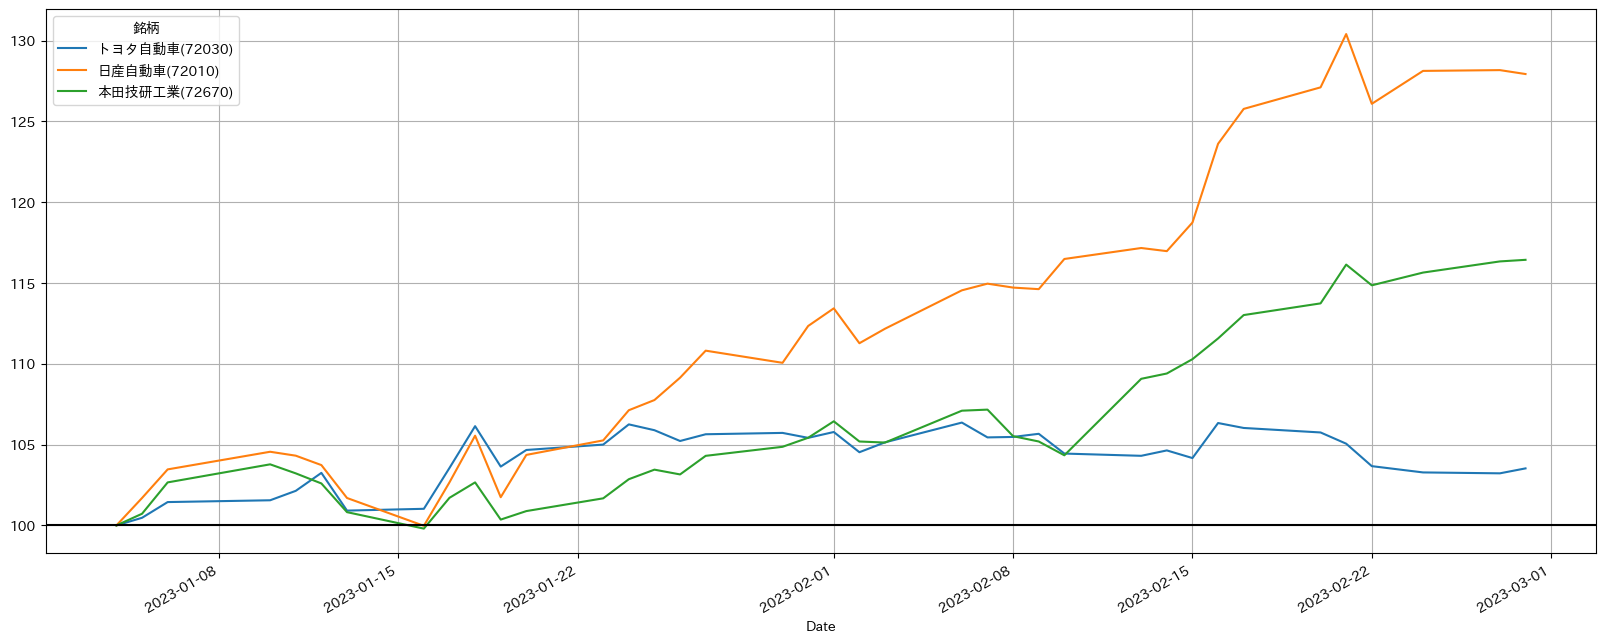

In [66]:
# 銘柄
target_symbols = TARGET_SYMBOLS
# 基準日
base_date = BASE_DATE

# 対象銘柄および基準日以降のデータに絞り込み (計算量を減少させるため)
#df_work = df_p.loc[(df_p["Code"].isin(target_symbols)) & (df_p["Date"] >= base_date)].copy()
df_work = df_p.copy()

# # 株価をフィルするために並べ替えます
df_work.sort_values(["Code", "Date"], inplace=True)
# # 株価をフィルするために0をnanに置き換えます
df_work["AdjustmentClose"].replace({0.0: np.nan}, inplace=True)
# # 終値が0の場合は前営業日の終値を使用します
df_work.loc[:, "AdjustmentClose"] = df_work.groupby("Code")["AdjustmentClose"].ffill()
# # 終値がnanの場合は翌営業日の終値を使用します (データの先頭を処理します)
# df_work.loc[:, "AdjustmentClose"] = df_work.groupby("Code")["AdjustmentClose"].bfill()

# 基準日の終値を基準価格としてコピーします
df_work.loc[:, "base_price"] = df_work.loc[df_work["Date"] == base_date, "AdjustmentClose"]
# base_priceをフォーワードフィルします
df_work.loc[:, "base_price"] = df_work.loc[:, "base_price"].ffill()

# 基準価格からの変化率を計算
df_work.loc[:, "percentage"] = df_work["AdjustmentClose"].div(df_work["base_price"]) * 100

# 銘柄情報と結合します
# Date 列が重複しているため df_list から削除して結合しています
df_work = pd.merge(df_work, df_list.drop(columns=["Date"]), on="Code")
# 銘柄コードと銘柄名を結合します
df_work["銘柄"] = df_work["CompanyName"] + "(" + df_work["Code"] + ")"

# プロット用に整形します
df_pivot = df_work.pivot(index='Date', columns='銘柄', values='percentage')

# プロットします
ax = df_pivot.plot(figsize=(20, 8), grid=True)

# 縦軸100の位置に基準線を描画します
ax.axhline(y=100, color="black")